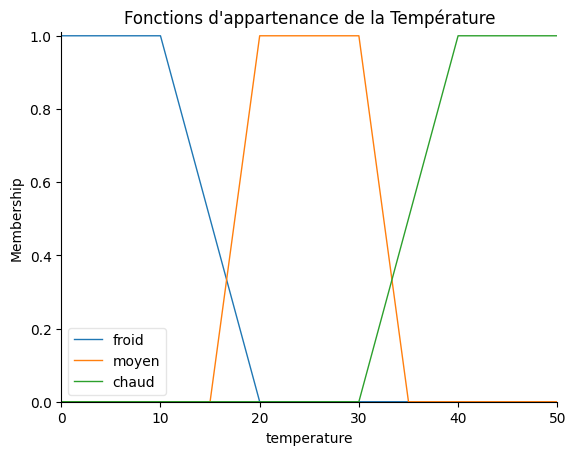

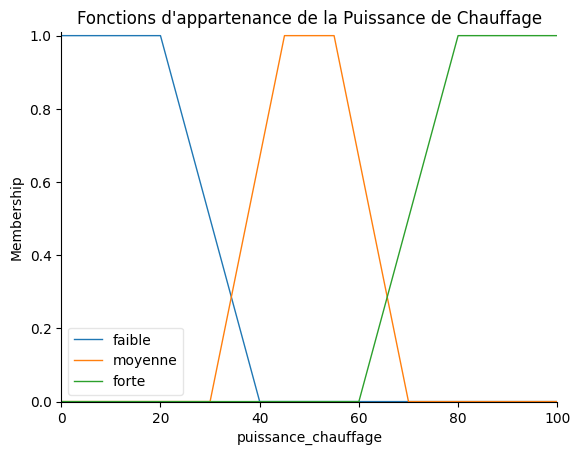

Pour une température de 25°C, Puissance de chauffage = 50.00%


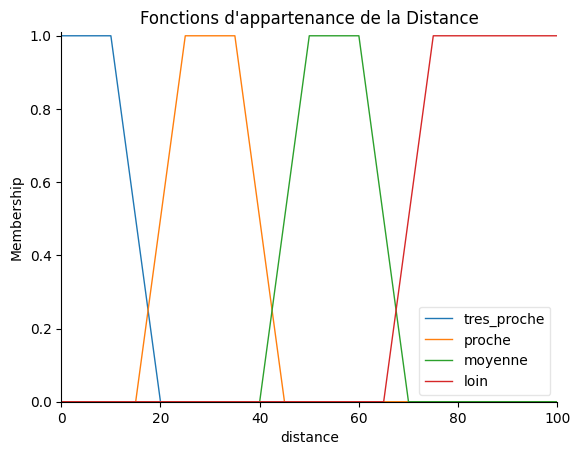

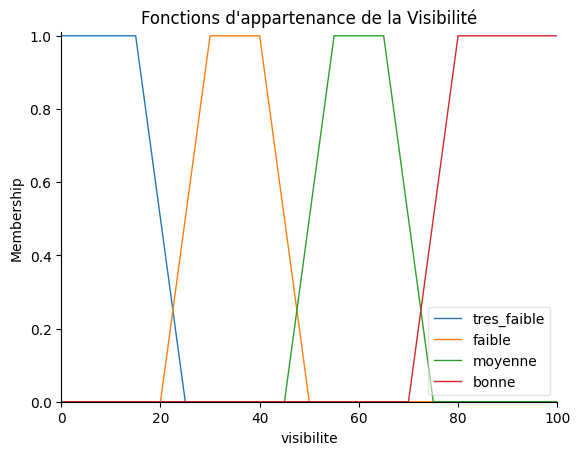

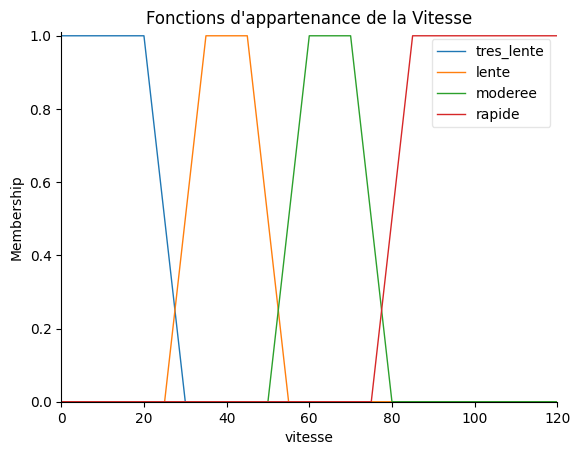


Test de différents scénarios:
Distance: 80m, Visibilité: 90%, Vitesse recommandée: 99.9 km/h
Distance: 50m, Visibilité: 50%, Vitesse recommandée: 65.0 km/h
Distance: 20m, Visibilité: 80%, Vitesse recommandée: 40.0 km/h
Distance: 50m, Visibilité: 20%, Vitesse recommandée: 13.8 km/h
Distance: 10m, Visibilité: 10%, Vitesse recommandée: 12.7 km/h


In [12]:
# TP1 : Implémentation de la logique floue
# MAROUANE BOUFAROUJ - IID3
# ENSA Khouribga - Ingénierie des Connaissances 

# Import des bibliothèques nécessaires
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Configuration pour afficher les labels en français
plt.rcParams['axes.unicode_minus'] = False

# Partie 1 : Système de Contrôle de Température
# Création des variables de température et de puissance de chauffage
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
puissance_chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'puissance_chauffage')

# Définition des fonctions d'appartenance pour la température
temperature['froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Définition des fonctions d'appartenance pour la puissance de chauffage
puissance_chauffage['faible'] = fuzz.trapmf(puissance_chauffage.universe, [0, 0, 20, 40])
puissance_chauffage['moyenne'] = fuzz.trapmf(puissance_chauffage.universe, [30, 45, 55, 70])
puissance_chauffage['forte'] = fuzz.trapmf(puissance_chauffage.universe, [60, 80, 100, 100])

# Visualisation des fonctions d'appartenance
temperature.view()
plt.title('Fonctions d\'appartenance de la Température')
plt.show()

puissance_chauffage.view()
plt.title('Fonctions d\'appartenance de la Puissance de Chauffage')
plt.show()

# Définition des règles floues
regle1 = ctrl.Rule(temperature['froid'], puissance_chauffage['forte'])
regle2 = ctrl.Rule(temperature['moyen'], puissance_chauffage['moyenne'])
regle3 = ctrl.Rule(temperature['chaud'], puissance_chauffage['faible'])

# Création et simulation du système de contrôle
systeme_chauffage = ctrl.ControlSystem([regle1, regle2, regle3])
simulation_chauffage = ctrl.ControlSystemSimulation(systeme_chauffage)

# Test du système avec une valeur de température
simulation_chauffage.input['temperature'] = 25
simulation_chauffage.compute()
print(f"Pour une température de 25°C, Puissance de chauffage = {simulation_chauffage.output['puissance_chauffage']:.2f}%")

# Partie 3 : Système de Contrôle de Vitesse du Véhicule
# Création des variables d'entrée et de sortie
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'visibilite')
vitesse = ctrl.Consequent(np.arange(0, 121, 1), 'vitesse')

# Définition des fonctions d'appartenance pour la distance (en mètres)
distance['tres_proche'] = fuzz.trapmf(distance.universe, [0, 0, 10, 20])
distance['proche'] = fuzz.trapmf(distance.universe, [15, 25, 35, 45])
distance['moyenne'] = fuzz.trapmf(distance.universe, [40, 50, 60, 70])
distance['loin'] = fuzz.trapmf(distance.universe, [65, 75, 100, 100])

# Définition des fonctions d'appartenance pour la visibilité (en pourcentage)
visibilite['tres_faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 15, 25])
visibilite['faible'] = fuzz.trapmf(visibilite.universe, [20, 30, 40, 50])
visibilite['moyenne'] = fuzz.trapmf(visibilite.universe, [45, 55, 65, 75])
visibilite['bonne'] = fuzz.trapmf(visibilite.universe, [70, 80, 100, 100])

# Définition des fonctions d'appartenance pour la vitesse (en km/h)
vitesse['tres_lente'] = fuzz.trapmf(vitesse.universe, [0, 0, 20, 30])
vitesse['lente'] = fuzz.trapmf(vitesse.universe, [25, 35, 45, 55])
vitesse['moderee'] = fuzz.trapmf(vitesse.universe, [50, 60, 70, 80])
vitesse['rapide'] = fuzz.trapmf(vitesse.universe, [75, 85, 120, 120])

# Visualisation des fonctions d'appartenance
distance.view()
plt.title('Fonctions d\'appartenance de la Distance')
plt.show()

visibilite.view()
plt.title('Fonctions d\'appartenance de la Visibilité')
plt.show()

vitesse.view()
plt.title('Fonctions d\'appartenance de la Vitesse')
plt.show()

# Définition des règles floues pour le contrôle de la vitesse
regles = [
    # Règles de base
    ctrl.Rule(distance['loin'] & visibilite['bonne'], vitesse['rapide']),
    ctrl.Rule(distance['moyenne'] & visibilite['bonne'], vitesse['moderee']),
    ctrl.Rule(distance['proche'] & visibilite['bonne'], vitesse['lente']),
    ctrl.Rule(distance['tres_proche'], vitesse['tres_lente']),
    
    # Règles de sécurité pour faible visibilité
    ctrl.Rule(visibilite['tres_faible'], vitesse['tres_lente']), # Règle de sécurité pour très faible visibilité
    ctrl.Rule(distance['moyenne'] & visibilite['faible'], vitesse['lente']), # Vitesse prudente pour distance moyenne et faible visibilité
    
    # Combinaisons supplémentaires
    ctrl.Rule(distance['loin'] & visibilite['moyenne'], vitesse['moderee']),
    ctrl.Rule(distance['moyenne'] & visibilite['moyenne'], vitesse['moderee']),
    ctrl.Rule(distance['proche'] & visibilite['moyenne'], vitesse['lente']),
]

# Création et simulation du système de contrôle de vitesse
systeme_vitesse = ctrl.ControlSystem(regles)
simulation_vitesse = ctrl.ControlSystemSimulation(systeme_vitesse)

# Fonction pour tester différents scénarios
def tester_scenario(dist, vis):
    simulation_vitesse.input['distance'] = dist
    simulation_vitesse.input['visibilite'] = vis
    simulation_vitesse.compute()
    return simulation_vitesse.output['vitesse']

# Test de différents scénarios
scenarios = [
    (80, 90),  # Grande distance, Bonne visibilité
    (50, 50),  # Distance moyenne, Visibilité moyenne
    (20, 80),  # Distance proche, Bonne visibilité
    (50, 20),  # Distance moyenne, Faible visibilité
    (10, 10),  # Très proche, Très faible visibilité
]

print("\nTest de différents scénarios:")
for dist, vis in scenarios:
    vitesse_recommandee = tester_scenario(dist, vis)
    print(f"Distance: {dist}m, Visibilité: {vis}%, Vitesse recommandée: {vitesse_recommandee:.1f} km/h")